[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP90086-Practical-Solutions/blob/master/Week%203/workshop03_solution.ipynb)

In [ ]:
import scipy
scipy.__version__

'1.7.3'

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/My Drive/COMP90086 (T)/Week 3/"

Mounted at /content/gdrive


## In case you forget...
- My name is Khoi Nguyen, and you can call me **Khoi**
- 2nd year - Master of Engineering (Mechatronics) a.k.a *''Yes, we might have met in another subject!" 👌*
- Email: `tuankhoi@unimelb.edu.au` || `tuankhoin@student.unimelb.edu.au`

| If... | Email me | Email Jiayang |
|---|---|---|
Questions on subject content | ✅ | ✅ |
'HOmEwOrk aTe mY dOG' | | ✅ |
'Gimme marks' | | ✅ |
'My homie AFK / MIA' | | ✅ |
Teaching quality feedback | ✅ | ✅ |
Can You Feel My Heart - Bring Me The Horizon | ✅ | |

I'll post my altered version of the solutions by the end of every week to this repo: https://github.com/tuankhoin/COMP90086-Practical-Solutions

# COMP90086 Computer Vision
# Week 3: Filtering

In this workshop, you will have some practice of spatial filtering and frequency filtering on images.

#### Table of Contents

- Spatial Filtering
    - Standard filtering: blur, sharpen and edges
    - Cross-correlation vs. Convolution
    - Derivative of Gaussian
    - Handle border effect
   
- Frequency Filtering
    - Fourier transformation
    - Swap magnitude/phase
    - Fourier transform a filter 
    - Gaussian lowpass filter in the frequency domain
    


# Spatial Filtering

## (1) Standard filtering: blur, sharpen and edge detection

### How to filter

In [ ]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt

In [ ]:
#read in an image from a filepath as graycsale.
img= cv2.imread(path + "img1.png", cv2.IMREAD_GRAYSCALE) 

The [`cv2.filter2D(src, ddepth, kernel)`](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) operation convolve a kernel with an image.

The `filter2D()` function requires three input arguments:

- The first argument is the source image.

- The second argument is ddepth, which indicates the depth (no. bits used to represent color in each pixel) of the resulting image. A value of -1 indicates that the final image will also have the same depth as the source image **(probably doesn't matter much, leave it to -1 should be fine in most cases)**.

- The final input argument is the kernel, which we apply to the source image.

In [ ]:
# Tip: Every time you need something:
# cv2.filter2D?
# Or maybe just hover over the function if your plugin already has pop-up docstring

### Blur

#### Average Blur

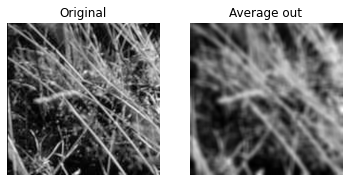

In [ ]:
# average filter
avg_kernel = np.ones((15,15),np.float32)/225
avg_out = cv2.filter2D(img,-1,avg_kernel)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray') 
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(avg_out,cmap='gray') 
plt.title('Average out')
plt.axis('off')
plt.show()

#### Gaussian filter

[`cv2.getGaussianKernel(ksize, sigma)`](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa)
- `ksize` - kernel size, should be odd and positive (3,5,...)
- `sigma` - Gaussian standard deviation. 

[`np.outer(a, b, out=None)`](https://numpy.org/doc/stable/reference/generated/numpy.outer.html)
- Compute the outer product of two vectors.

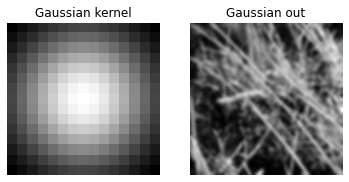

In [ ]:
# Gaussian filter size 15

# 1D gaussian kernel (size, sigma)
gau_kernel = cv2.getGaussianKernel(15,5)
# Make it 2D
gau_kern2d = np.outer(gau_kernel, gau_kernel)
# Remember, we have to normalize the filters to 1 every time!
gau_kern2d = gau_kern2d / gau_kern2d.sum()
# Now we filter!
gau_out = cv2.filter2D(img,-1,gau_kern2d)
    
plt.subplot(1,2,1)
plt.imshow(gau_kern2d,cmap='gray')
plt.title('Gaussian kernel')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gau_out,cmap='gray') 
plt.title('Gaussian out')
plt.axis('off')
plt.show()

**Think for a while**: What will happen if the kernel elements do not sum to 1?

### Sharpen

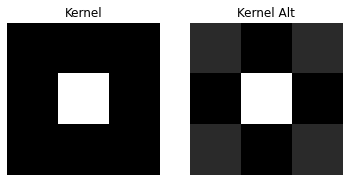

In [ ]:
shap_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])  
shap_kernel_alt = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])  

plt.subplot(1,2,1)
plt.imshow(shap_kernel, cmap='gray') 
plt.title('Kernel')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(shap_kernel_alt, cmap='gray') 
plt.title('Kernel Alt')
plt.axis('off')

plt.show()

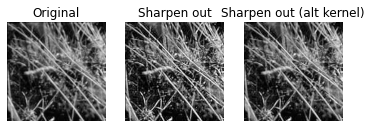

In [ ]:
shapen_out= cv2.filter2D(img, -1, shap_kernel)

plt.subplot(1,3,1)
plt.imshow(img,cmap='gray') 
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(shapen_out,cmap='gray') 
plt.title('Sharpen out')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.filter2D(img, -1, shap_kernel_alt),cmap='gray') 
plt.title('Sharpen out (alt kernel)')
plt.axis('off')
 
plt.show()

### Edge detection

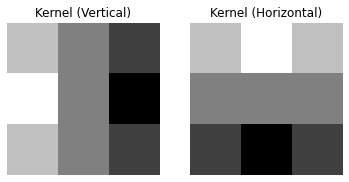

In [ ]:
# Sobel Edge Detection

# edge_out_y3= cv2.Sobel(img,cv2.CV_8U,dx=1,dy=0,ksize=3)
# edge_out_x3= cv2.Sobel(img,cv2.CV_8U,dx=0,dy=1,ksize=3)

# X-Direction Kernel (Vertical)
sobel_kernel_x =  np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
# Y-Direction Kernel (Horizontal)
sobel_kernel_y =  np.array([[1,2,1], [0,0,0], [-1,-2,-1]])   

plt.subplot(1,2,1)
plt.imshow(sobel_kernel_x,cmap='gray') 
plt.title('Kernel (Vertical)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sobel_kernel_y,cmap='gray') 
plt.title('Kernel (Horizontal)')
plt.axis('off')

plt.show()

The following is the syntax for applying Sobel edge detection using OpenCV:

[`cv2.Sobel(src, ddepth, dx, dy)`](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)
    
- `ddepth` is the depth of the destination image 
- `dx` is Horizontal sobel derivative 
- `dy` is vertical sobel derivative
- `ksize` is the kernel size.

The parameter ddepth specifies the precision of the output image, while dx and dy specify the order of the derivative in each direction. For example:
- If dx=1 and dy=0, we compute the 1st derivative Sobel image in the x-direction.

If both dx=1 and dy=1, we compute the 1st derivative Sobel image in both directions

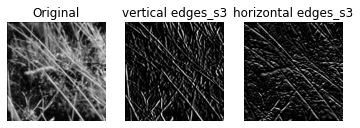

In [ ]:
sobel_out_x = cv2.filter2D(img,-1,sobel_kernel_x)
sobel_out_y = cv2.filter2D(img,-1,sobel_kernel_y)

plt.subplot(1,3,1)
#the figure has 1 row, 3 columns, and this plot is the first plot.
plt.imshow(img,cmap='gray') 
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
#the figure has 1 row, 3 columns, and this plot is the second plot.
plt.imshow(sobel_out_x,cmap='gray') 
plt.title('vertical edges_s3')
plt.axis('off')
 
plt.subplot(1,3,3)
#the figure has 1 row, 2 columns, and this plot is the third plot.
plt.imshow(sobel_out_y,cmap='gray') 
plt.title('horizontal edges_s3')
plt.axis('off')

plt.show()

## (2) Cross-correlation vs. Convolution

![image](https://glassboxmedicine.files.wordpress.com/2019/07/convgif.gif?w=616)

(Source: This animation appears in many places, including [here](https://hackernoon.com/visualizing-parts-of-convolutional-neural-networks-using-keras-and-cats-5cc01b214e59))

<center><font color="#4d79ff" size="4"> Cross-correlation vs. Convolution </font></center>

![Image of cross-correlation](https://miro.medium.com/max/700/1*RhHoldDIzmca3ula71tkFg.png)

![Image of convolution](https://miro.medium.com/max/700/1*DJIJX1Adlo_DzKo63IBYSg.png)

(Image Source: These images appears in many places, including [here](https://towardsdatascience.com/convolution-vs-correlation-af868b6b4fb5))

* Order matters in convolution -> Effect of one on another
* Cross-correlation amplifies difference -> Compare similarity

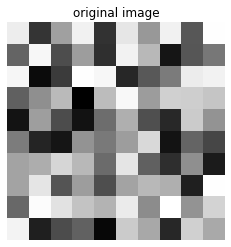

In [ ]:
#cv2.filter2D does correlation (doesn't matter if our filter is symmetric though)

# to compare convolution and correlation, we use scipy.signal, which contains both convolution and correlation
# If signal is not available, update your scipy to latest version (version 1.7+ should work)
from scipy import signal

imgr = np.random.randint(255, size=(10,10),dtype=np.uint8) #random a small image

plt.imshow(imgr,cmap='gray') 
plt.title('original image')
plt.axis('off')
plt.show()  

[`scipy.signal.correlate2d( )`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html): Cross-correlate two 2-dimensional arrays.

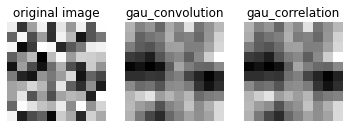

In [ ]:
# gaussian filter

gau_kernel = cv2.getGaussianKernel(3,3)# 1d gaussian kernel (size, sigma)
gau_kern2d = np.outer(gau_kernel, gau_kernel )
gau_kern2d = gau_kern2d/gau_kern2d.sum()

#gau_out_corr = cv2.filter2D(imgr,-1,gau_kern2d,borderType=cv2.BORDER_REFLECT) #correlation
gau_out_corr = signal.correlate2d(imgr, gau_kern2d, boundary='symm', mode='same') #correlation

#gau_kern2d_conv=np.flip(gau_kern2d)
#gau_out_conv = cv2.filter2D(imgr,-1,gau_kern2d_conv)  
gau_out_conv = signal.convolve2d(imgr, gau_kern2d, boundary='symm', mode='same') #convolution

plt.subplot(1,3,1)
plt.imshow(imgr,cmap='gray') 
plt.title('original image')
plt.axis('off')
 
plt.subplot(1,3,2)
plt.imshow(gau_out_conv,cmap='gray') 
plt.title('gau_convolution')
plt.axis('off')
 
plt.subplot(1,3,3)
plt.imshow(gau_out_corr,cmap='gray') 
plt.title('gau_correlation')
plt.axis('off') 

plt.show() # the kernel is symmetric, so the outputs are the same

So if kernel is symmetric, cross-correlation or convoltion no longer matters!

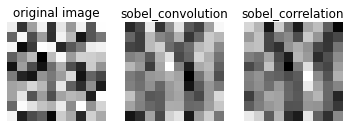

In [ ]:
sobel_kernel =  np.array([[1,0,-1], [2,0,-2], [1,0,-1]])   
#sobel_out_corr = cv2.filter2D(imgr,-1,sobel_kernel,borderType=cv2.BORDER_REFLECT)
sobel_out_corr = signal.correlate2d(imgr, sobel_kernel, boundary='symm', mode='same') #correlation

# A hack to use filter2D() with convolution: just flip it!
#sobel_kernel_conv = np.flip(sobel_kernel)
#sobel_out_conv = cv2.filter2D(imgr,-1,sobel_kernel_conv)
sobel_out_conv = signal.convolve2d(imgr, sobel_kernel, boundary='symm', mode='same') #convolution

plt.subplot(1,3,1)
plt.imshow(imgr,cmap='gray') 
plt.title('original image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sobel_out_conv,cmap='gray') 
plt.title('sobel_convolution')
plt.axis('off')
 
plt.subplot(1,3,3)
plt.imshow(sobel_out_corr,cmap='gray') 
plt.title('sobel_correlation')
plt.axis('off') 

plt.show() # the kernel is asymmetric, so the outputs are different

**Question**: How different are the edges when you swap the Sobel kernel? (And, what can you to do swap?)

## (3) Derivative of Gaussian

[`np.gradient( )`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html): Return the gradient of an N-dimensional array.

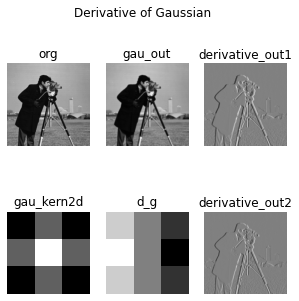

In [ ]:
#we use scipy.signal, which contains correlation
from scipy import signal

img2= cv2.imread(path + "img2.png",cv2.IMREAD_GRAYSCALE) 

gau_kernel = cv2.getGaussianKernel(3,1) # 1d gaussian kernel (size, sigma)
gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d = gau_kern2d/np.abs(gau_kern2d).sum()

gau_out = signal.convolve2d(img2,gau_kern2d, boundary='symm', mode='same')

#Return the gradient of an N-dimensional array.
derivative_out1 = np.gradient(gau_out,axis=1)

#plt.subplot(): You can draw as many plots you like on one figure, 
#just descibe the number of rows, columns, and the index of the plot. 
#For example, Draw 6 plots in a figure with 2 row, 3 columns.
#stacking in two directions （row, columns,the index of the plot）


#Figure size in inches (default)
plt.subplots(figsize=(5, 5)) 

plt.subplot(2,3,1)
plt.imshow(img2,cmap='gray') 
plt.title('org')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(gau_out,cmap='gray') 
plt.title('gau_out')
plt.axis('off')
 
plt.subplot(2,3,3)
plt.imshow(derivative_out1,cmap='gray') 
plt.title('derivative_out1')
plt.axis('off') 

#The derivative of a Gaussian Process is also a Gaussian Process
d_g=np.gradient(gau_kern2d,axis=1) 
derivative_out2=signal.convolve2d(img2,d_g, boundary='symm', mode='same')

plt.subplot(2,3,4)
plt.imshow(gau_kern2d,cmap='gray') 
plt.title('gau_kern2d')
plt.axis('off')


plt.subplot(2,3,5)
plt.imshow(d_g,cmap='gray') 
plt.title('d_g')
plt.axis('off')


plt.subplot(2,3,6)
plt.imshow(derivative_out2,cmap='gray') 
plt.title('derivative_out2')
plt.axis('off') 

plt.suptitle("Derivative of Gaussian")
plt.show() 

#### Challenge!

UniMelb Rover Multi-Ops Machine (URMOM) discovers a strange message on the Mars. To prevent Area 52 from stealing the message, URMOM encrypted the message by adding random lines to the original message and sent it to you. Decypher URMOM!

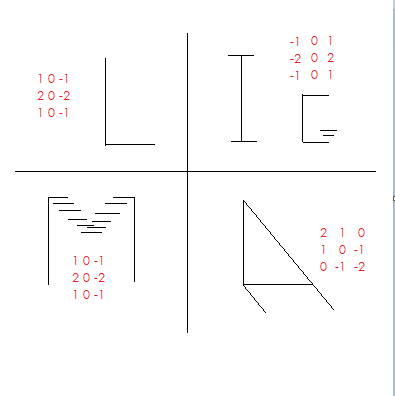

## (4) Handle border effect

[borderType](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5): pixel extrapolation method

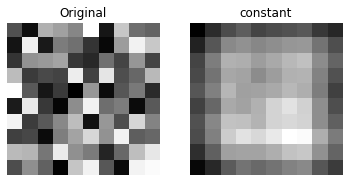

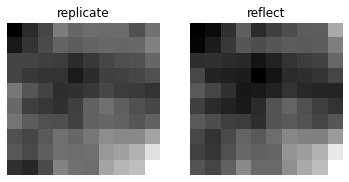

In [ ]:
img= np.random.randint(255, size=(10,10),dtype=np.uint8) #random  a small image


gau_kernel = cv2.getGaussianKernel(5,5)# 1d gaussian kernel (size, sigma)
gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d = gau_kern2d/gau_kern2d.sum()

#Various border types, image boundaries are denoted with |
gau_out1 = cv2.filter2D(img,-1,gau_kern2d, borderType = cv2.BORDER_CONSTANT ) #iiiiii|abcdefgh|iiiiiii
gau_out2 = cv2.filter2D(img,-1,gau_kern2d, borderType = cv2.BORDER_REPLICATE) #aaaaaa|abcdefgh|hhhhhhh
gau_out3 = cv2.filter2D(img,-1,gau_kern2d, borderType = cv2.BORDER_REFLECT  ) #fedcba|abcdefgh|hgfedcb

plt.subplot(1,2,1)   
plt.imshow(img ,cmap='gray')  
plt.title('Original')
plt.axis('off')
                
plt.subplot(1,2,2)
plt.imshow(gau_out1,cmap='gray')  
plt.title('constant')
plt.axis('off')

plt.show()

plt.subplot(1,2,1)
plt.imshow(gau_out2,cmap='gray') 
plt.title('replicate')
plt.axis('off')

 
plt.subplot(1,2,2)
plt.imshow(gau_out3,cmap='gray') 
plt.title('reflect')
plt.axis('off')
plt.show()

**Think for a while**: How different are the results?

# Frequency Filtering

## (1) Fourier transformation
*A pain in the ass for Mechatronics students. But don't worry, the maths won't be examinable!*

<center><font color="#4d79ff" size="4">  Fourier series and transform <center></font> 

![Image of Fourier series and transform](https://upload.wikimedia.org/wikipedia/commons/2/2b/Fourier_series_and_transform.gif)

(Image courtesy: [Wikipedia](https://en.wikipedia.org/wiki/Fourier_series))

We took an image, we decompose it into magnitude and phase

In [ ]:
def FFT_image(img):
    # Fast Fourier transform
    f = np.fft.fft2(img)
    
    # Shift the low frequency component to the center
    f = np.fft.fftshift(f)

    # Fourier phase and magnitude
    phase = np.angle(f)
    magnitude = np.abs(f)
    
    #Figure size in inches (default)
    plt.subplots(figsize=(10, 10)) 
    
    # Original image
    plt.subplot(1,3,1)
    plt.imshow(img ,cmap='gray')  
    plt.title('Image')
    plt.axis('off')

    # Phase
    plt.subplot(1,3,2)
    plt.imshow(phase ,cmap='gray')  
    plt.title('Phase')
    plt.axis('off')
    
    # Magnitude
    plt.subplot(1,3,3)
    plt.imshow(magnitude ,cmap='gray')  
    plt.title('Magnitude')
    plt.axis('off')

    plt.show()

Low frequencies in images: pixel values that are changing slowly.

High frequencies in images mean pixel values that are changing dramatically. 

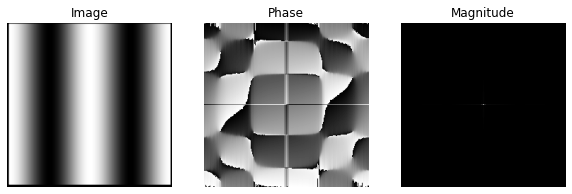

In [ ]:
img= cv2.imread(path + "F1.1.png",cv2.IMREAD_GRAYSCALE) 
FFT_image(img)

Here we've got a signal that's quite low frequency. It's only in the horizontal. So we've got a Fourier transform that's got just two little peaks representing the frequency of that sinusoid and there across the X, because it's only in the horizontal.

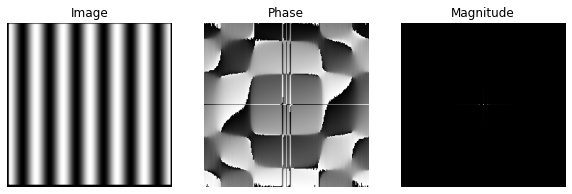

In [ ]:
img = cv2.imread(path + "F1.2.png",cv2.IMREAD_GRAYSCALE) 
FFT_image(img)

Here we have a higher frequency sinusoid. So we have slightly more spaced out dots. It's a higher frequency represented.

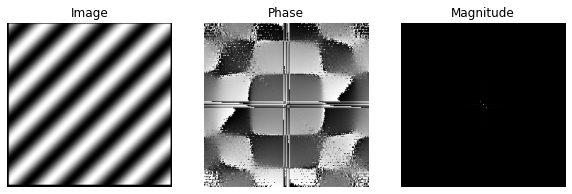

In [ ]:
img = cv2.imread(path + "F1.3.png",cv2.IMREAD_GRAYSCALE) 
FFT_image(img)

This is a diagonal sinusoid. So we've got the same dots, essentially the same frequency, but along the diagonal direction.

In [ ]:
def FFT_image_log(img):
    # Fourier transform
    f = np.fft.fft2(img)
    # Shift the low frequency component to the center
    f = np.fft.fftshift(f)
    
    # Fourier phase and magnitude
    phase = np.angle(f)
    magnitude = np.abs(f)
    # the orginal magnitute is too small, we show log of the value to make it clear
    magnitude_log = np.log(np.abs(f))  
    
    #figure size
    plt.subplots(figsize=(14, 3.5)) 

    # Original image
    plt.subplot(1,4,1)
    plt.imshow(img ,cmap='gray')  
    plt.title('image')
    plt.axis('off')

    # Phase
    plt.subplot(1,4,2)
    plt.imshow(phase ,cmap='gray')  
    plt.title('phase')
    plt.axis('off')
    
    # the orginal magnitude
    plt.subplot(1,4,3)
    plt.imshow(magnitude ,cmap='gray')  
    plt.title('magnitude')
    plt.axis('off')

    # log of the orginal magnitude
    plt.subplot(1,4,4)
    plt.imshow(magnitude_log ,cmap='gray')  
    plt.title('log magnitude')
    plt.axis('off')

    plt.show()

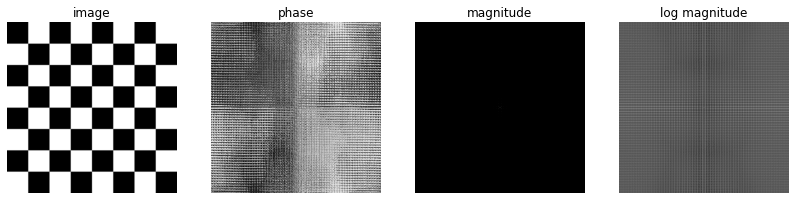

In [ ]:
img = cv2.imread(path + "F1.4.png",cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

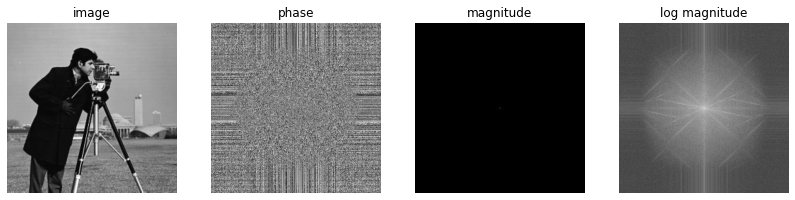

In [ ]:
img = cv2.imread(path + "F1.5.png",cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

The line/stripe in magnitude corresponds to anything that's orthogonal to that in the image.

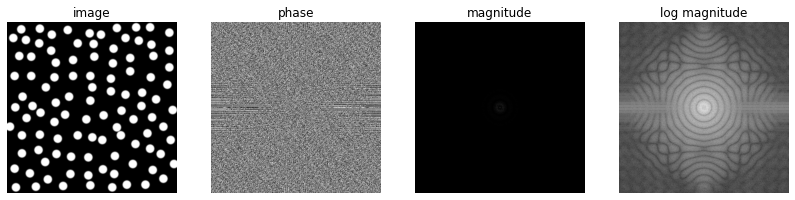

In [ ]:
img = cv2.imread(path + "F1.6.png",cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

We've got little dots, so there's no vertical lines. There's no horizontal lines. It's just circles everywhere.

And so you see this strong circular pattern. The period of the pattern is probably reflecting. Something about the the spacing of the dots are the size of the dots as well.

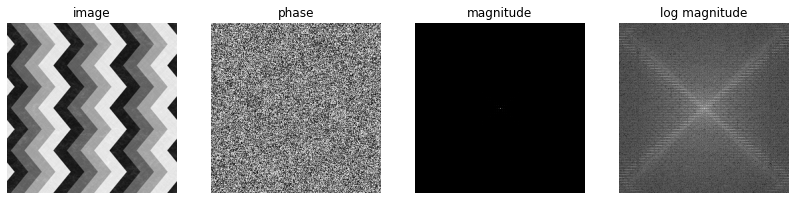

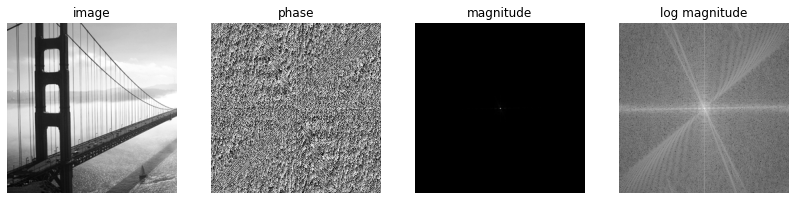

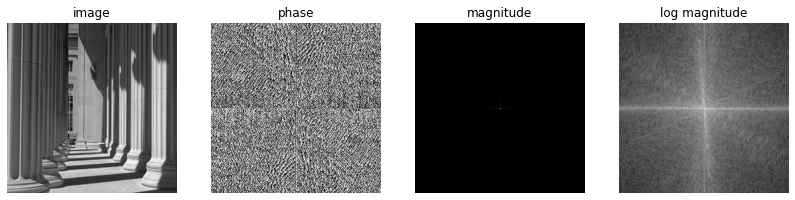

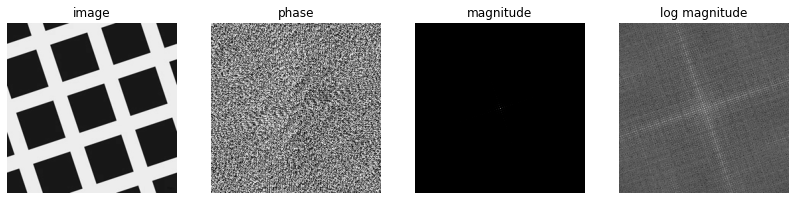

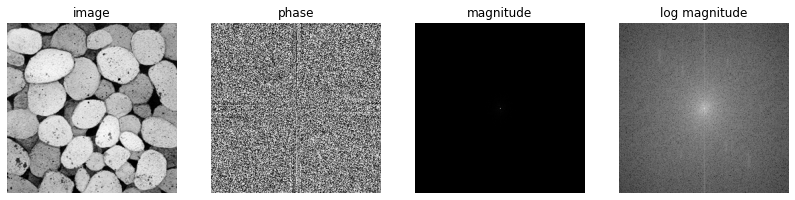

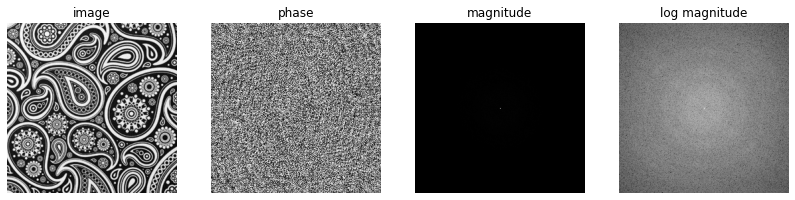

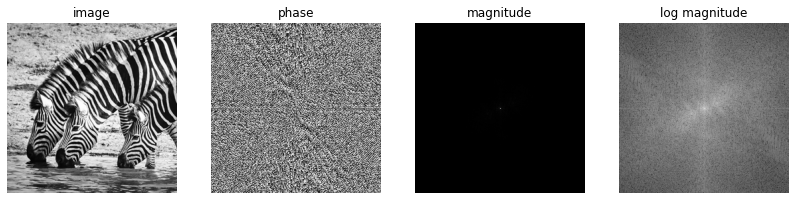

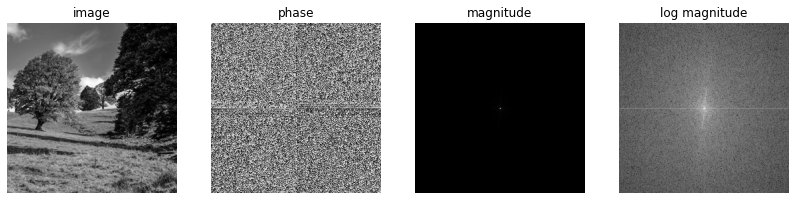

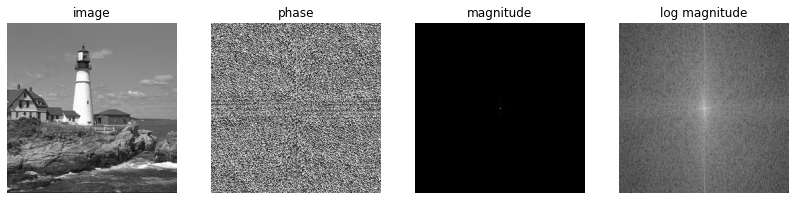

In [ ]:
for i in range(7,16):
  img = cv2.imread(path + f"F1.{i}.png",cv2.IMREAD_GRAYSCALE) 
  FFT_image_log(img)

## (2) Swap magnitude/phase 

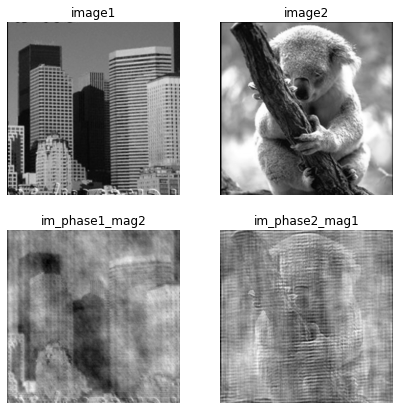

In [ ]:
img1 = cv2.imread(path + "f2.1.png",cv2.IMREAD_GRAYSCALE) 
img1 = cv2.resize(img1,(350,350))

# Fourier transform
f = np.fft.fft2(img1)
# Shift the low frequency component to the center
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase1 = np.angle(f)
magnitude1 = np.abs(f)

img2 = cv2.imread(path + "f2.2.png",cv2.IMREAD_GRAYSCALE) 
img2 = cv2.resize(img2,(350,350))

# Fourier transform
f = np.fft.fft2(img2)
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase2 = np.angle(f)
magnitude2 = np.abs(f)

phase1_mag2 = np.multiply(magnitude2, np.exp(1j*phase1))
phase2_mag1 = np.multiply(magnitude1, np.exp(1j*phase2))

# Invert Fourier transform to get images

# im_phase1_mag2 = np.real(np.fft.ifft2(np.fft.fftshift(phase1_mag2)))
# im_phase2_mag1 = np.real(np.fft.ifft2(np.fft.fftshift(phase2_mag1 )))

# fftshift -> ifftshift

# (Invert of FFT(Shift the low-frequency component back to original location))
im_phase1_mag2 = np.real(np.fft.ifft2(np.fft.ifftshift(phase1_mag2)))
im_phase2_mag1 = np.real(np.fft.ifft2(np.fft.ifftshift(phase2_mag1 )))


#Figure size
plt.subplots(figsize=(7, 7)) 

plt.subplot(2,2,1)
plt.imshow(img1 ,cmap='gray')  
plt.title('image1')
plt.axis('off')
 
plt.subplot(2,2,2)
plt.imshow(img2 ,cmap='gray')  
plt.title('image2')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(im_phase1_mag2, cmap='gray')  
plt.title('im_phase1_mag2')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(im_phase2_mag1 ,cmap='gray')  
plt.title('im_phase2_mag1')
plt.axis('off')

plt.show()

#What aspects of the image are captured by the magnitude and the phase of the FT? 

## (3) Fourier transform a filter 

Convolution in spatial domain = multiplication in Fourier domain

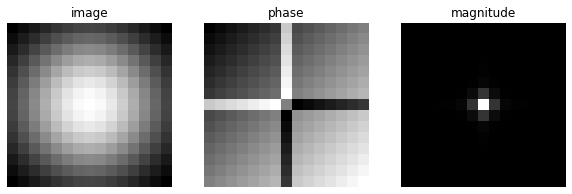

In [ ]:
# Gaussian filter size 15
 
gau_kernel = cv2.getGaussianKernel(15,5)# 1d gaussian kernel (size, sigma)
gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d=gau_kern2d/gau_kern2d.sum()
  
# Fourier transform
f = np.fft.fft2(gau_kern2d)
# Shift the low frequency component to the center
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase = np.angle(f)
magnitude = np.abs(f)

plt.subplots(figsize=(10, 10)) 

plt.subplot(1,3,1)
plt.imshow(gau_kern2d ,cmap='gray')  
plt.title('image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(phase ,cmap='gray')  
plt.title('phase')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(magnitude ,cmap='gray')  
plt.title('magnitude')
plt.axis('off')

plt.show()

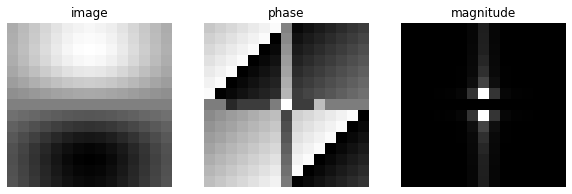

In [ ]:
gau_kern2d=np.gradient(gau_kern2d,axis=0)

# Fourier transform
f = np.fft.fft2(gau_kern2d)
# Shift the low frequency component to the center
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase = np.angle(f)
magnitude = np.abs(f)

             
plt.subplots(figsize=(10, 10)) 

plt.subplot(1,3,1)
plt.imshow(gau_kern2d ,cmap='gray')  
plt.title('image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(phase ,cmap='gray')  
plt.title('phase')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(magnitude ,cmap='gray')  
plt.title('magnitude')
plt.axis('off')

plt.show()

## Bandpass filter

Bandpass filter = a filter that removes a range of frequencies from a signal

Low pass filter = keep low spatial frequencies, remove high frequencies

High pass filter = keep high spatial frequencies, remove low frequencies


## (4) Gaussian lowpass filter in the frequency domain

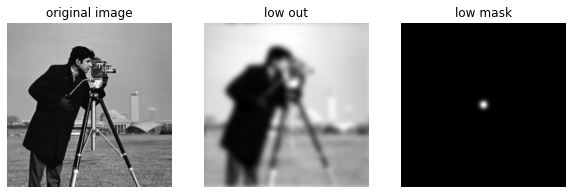

In [ ]:
radius_low = 10

img= cv2.imread(path + "f1.5.png",cv2.IMREAD_GRAYSCALE) 

 
# Fourier transform
f = np.fft.fft2(img)
# Shift the low frequency component to the center
f = np.fft.fftshift(f)


def Gauss_LowPass(f,radius_low):  
#values are higher near the center, and close to zero outside        
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = np.exp((-1)*dis**2/2/(radius_low**2))
    result = np.multiply(f, mask) 
    return result,mask

f_low_filtered,mask_low = Gauss_LowPass(f,radius_low)
  

# Invert Fourier transform to get the filtered image
# (Invert of FFT(Shift the low-frequency component back to original location))

# fftshift -> ifftshift
img_low = np.real(np.fft.ifft2(np.fft.ifftshift(f_low_filtered)))


plt.subplots(figsize=(10, 10)) 

plt.subplot(1,3,1)
plt.imshow(img ,cmap='gray')  
plt.title('original image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_low ,cmap='gray')  
plt.title('low out')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(mask_low ,cmap='gray')  
plt.title('low mask')
plt.axis('off')

plt.show()

#  Exercise

(1) Implement a 2D Gaussian blur using two 1D filters. Compare the running time with the 2D Gaussian filtering

(2) Try varying the kernel size of Gaussian filter and see what changes. e.g., blur with a 5x5 Gaussian vs. a 15x15 Gaussian. 

(3) Take an image and "delete" its magnitude or phase by replacing it with random values. 

(4) implement a Gaussian highpass filter in the frequency domain.

## (1) Implement a 2D Gaussian blur using two 1D filters.

In [ ]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt

# Measure execution time
import timeit

In [ ]:
# Hint
cv2.sepFilter2D?

Time:  0.0007683039984840434
Time:  0.002726441998675


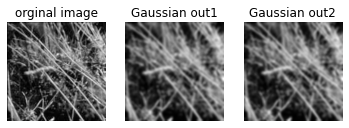

In [ ]:
img= cv2.imread(path + "img1.png",cv2.IMREAD_GRAYSCALE) 
 
# Gaussian filter size 15
# a 2d Gaussian kernel can be decomposed into 2 1D 
gau_kernel = cv2.getGaussianKernel(15,5)# 1d gaussian kernel (size, sigma)
gau_kernel=gau_kernel/gau_kernel.sum()

start = timeit.default_timer()
# Applies separable filters to the image.
gau_out1 = cv2.sepFilter2D(img,-1,gau_kernel,gau_kernel)
# this is equivant to  cv2.GaussianBlur(img,(15,15),5)
stop = timeit.default_timer()
print('Time: ', stop - start) 

gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d=gau_kern2d/gau_kern2d.sum()

start = timeit.default_timer()
gau_out2 = cv2.filter2D(img,-1,gau_kern2d)
stop = timeit.default_timer()
print('Time: ', stop - start) 


plt.subplot(1,3,1)
plt.imshow(img,cmap='gray' )
plt.title('orginal image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gau_out1,cmap='gray') 
plt.title('Gaussian out1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gau_out2,cmap='gray') 
plt.title('Gaussian out2')
plt.axis('off')

plt.show()

## (2) Varying the kernel size

Original Detailed Solution

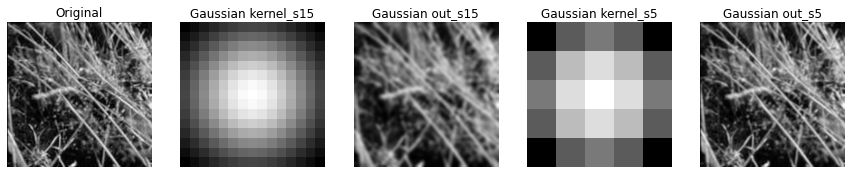

In [ ]:
img = cv2.imread(path + "img1.png",cv2.IMREAD_GRAYSCALE) 

# Gaussian filter size 15
# a 2d Gaussian kernel can be decomposed into 2 1D 
gau_kernel = cv2.getGaussianKernel(15,5)# 1d gaussian kernel (size, sigma)
gau_kernel=gau_kernel/gau_kernel.sum()
gau_out1 = cv2.sepFilter2D(img,-1,gau_kernel,gau_kernel)

gau_kern2d1 = np.outer(gau_kernel, gau_kernel)
gau_kern2d1=gau_kern2d1/gau_kern2d1.sum()
 
# Gaussian filter size 5
# a 2d Gaussian kernel can be decomposed into 2 1D 
gau_kernel2 = cv2.getGaussianKernel(5,5)# 1d gaussian kernel (size, sigma)
gau_kernel2=gau_kernel2/gau_kernel2.sum()
gau_out2 = cv2.sepFilter2D(img,-1,gau_kernel2,gau_kernel2)

gau_kern2d2= np.outer(gau_kernel2, gau_kernel2)
gau_kern2d2=gau_kern2d2/gau_kern2d2.sum()


plt.subplots(figsize=(15, 3)) 
plt.subplot(1,5,1)

plt.imshow(img,cmap='gray') 
plt.title('Original')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(gau_kern2d1,cmap='gray' )
plt.title('Gaussian kernel_s15')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(gau_out1,cmap='gray') 
plt.title('Gaussian out_s15')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(gau_kern2d2,cmap='gray' )
plt.title('Gaussian kernel_s5')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(gau_out2,cmap='gray') 
plt.title('Gaussian out_s5')
plt.axis('off')
plt.show()

Compact solution

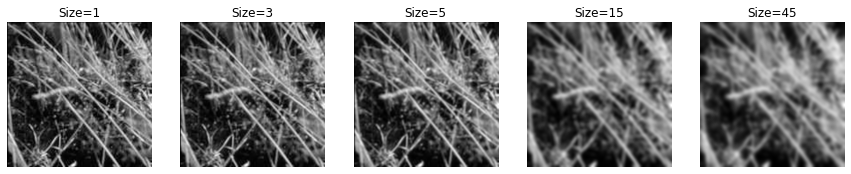

In [ ]:
img = cv2.imread(path + "img1.png",cv2.IMREAD_GRAYSCALE)

ks = [1,3,5,15,45]
_,ax = plt.subplots(1, len(ks), figsize=(len(ks)*3,3))

for i,k in enumerate(ks):
  # a 2d Gaussian kernel can be decomposed into 2 1D 
  gau_kernel = cv2.getGaussianKernel(k,5)# 1d gaussian kernel (size, sigma)
  gau_kernel = gau_kernel/gau_kernel.sum()
  gau_out = cv2.sepFilter2D(img,-1,gau_kernel,gau_kernel)

  ax[i].imshow(gau_out, cmap='gray')
  ax[i].set_title(f'Size={k}')
  ax[i].axis('off')

**Try this at home**: How about varied sigma instead of varied kernel size?

## (3) Random phrase/magnitute

These hints might save your time of recalling or searching: 
- To create a random phase & magnitude: `np.random.rand(shape[0],shape[1])`, `np.abs()`, `np.angle()`
- `from np.fft import *`
- $$F[Img] = Magnitude \times e^{j \times Phase} = \texttt{fftshift(fft2(...))}$$
- $$F^{-1}[Img] = \texttt{np.real(ifft2(fftshift(...)))}$$

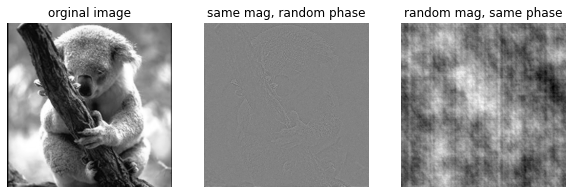

In [ ]:
img= cv2.imread(path + "f2.2.png",cv2.IMREAD_GRAYSCALE) 
 
# Fourier transform
f = np.fft.fft2(img)
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase = np.angle(f)
magnitude = np.abs(f)

# Make a random noise image to get random magnitude and phase
nz = np.random.rand(img.shape[0],img.shape[1])
f_nz = np.fft.fftshift(np.fft.fft2(nz))
rand_mag = np.abs(f_nz)
rand_phase = np.angle(f_nz)

# Combine image phase with random magnitude
phase_rand_mag = np.multiply(rand_mag, np.exp(1j*phase))

# Combine image magnitude with random phase
mag_rand_phase = np.multiply(magnitude, np.exp(1j*rand_phase))

# Invert Fourier transform to get images
im_phase = np.real(np.fft.ifft2(np.fft.fftshift(phase_rand_mag)))
im_magnitude = np.real(np.fft.ifft2(np.fft.fftshift(mag_rand_phase)))


plt.subplots(figsize=(10, 10)) 

plt.subplot(1,3,1)
plt.imshow(img ,cmap='gray')  
plt.title('orginal image')
plt.axis('off')
 
plt.subplot(1,3,2)
plt.imshow(im_phase ,cmap='gray')  
plt.title('same mag, random phase')
plt.axis('off')
 
plt.subplot(1,3,3)
plt.imshow(im_magnitude ,cmap='gray')  
plt.title('random mag, same phase')
plt.axis('off')
plt.show()

What information is preserved?

## (4) Gaussian highpass filter in the frequency domain.

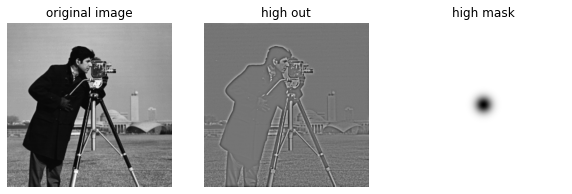

In [ ]:
# High and low spatial frequency thresholds
radius_high = 20

img = cv2.imread(path + "F1.5.png",cv2.IMREAD_GRAYSCALE) 
 
# Fourier transform
f = np.fft.fft2(img)
f = np.fft.fftshift(f)
 

def Gauss_HighPass(f,radius_high):  
    
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
    
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = 1-np.exp((-1)*dis**2/2/(radius_high**2))
             
    result = np.multiply(f, mask) 
    return result,mask


f_high_filtered,mask_high = Gauss_HighPass(f,radius_high)
 
# Invert Fourier transform to get the filtered image
img_high = np.real(np.fft.ifft2(np.fft.fftshift(f_high_filtered)))


plt.subplots(figsize=(10, 10))  

plt.subplot(1,3,1)
plt.imshow(img ,cmap='gray')  
plt.title('original image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_high ,cmap='gray')  
plt.title('high out')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(mask_high ,cmap='gray')  
plt.title('high mask')
plt.axis('off')

plt.show()

What can a bandpass filter create?

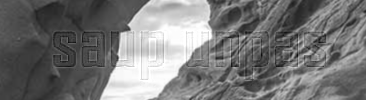